## Import required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Import Dataset

In [5]:
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## EDA

In [6]:
df.shape

(178, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [10]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

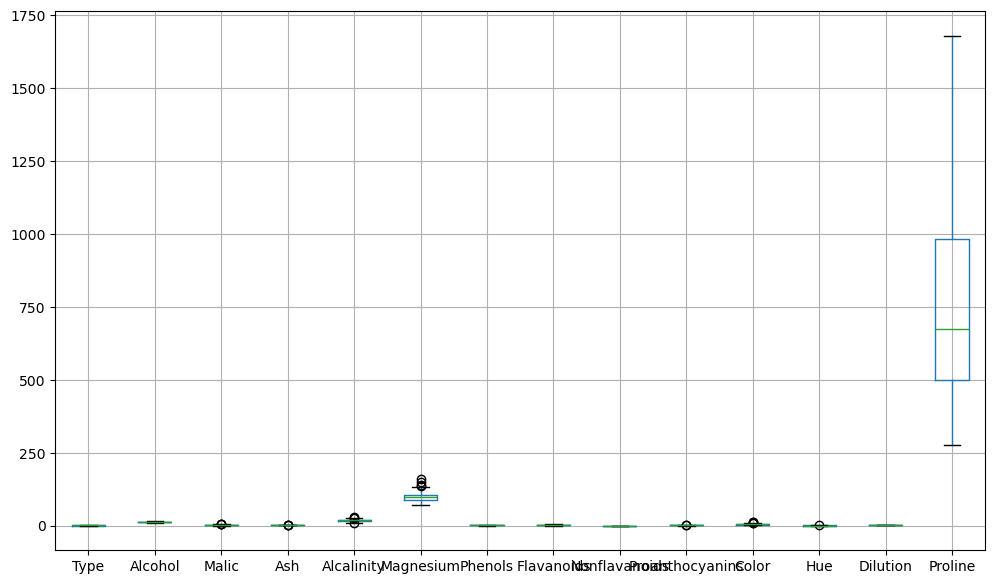

In [11]:
plt.figure(figsize=(12,7))
df.boxplot()

> **Key Insights :** Before performing PCA we have done some basic EDA and we can see the column 'Proline' have higher range of the values so we will need to standardize the data using standard scaler

## Standardization

In [12]:
# Standardization the numerical data 
scaler =StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA

In [13]:
## Transforming the standardized data into PCA
pca = PCA(n_components=None)
pca_values = pca.fit_transform(scaled_data)
## transforming pca data into DataFrame
pca_components = pd.DataFrame(pca_values, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])
pca_components

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


C:\Users\User\AppData\Local\Temp\ipykernel_10896\3277433986.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pca_components, x=pca_components.pc1, y=pca_components.pc2, palette='viridis')


<Axes: xlabel='pc1', ylabel='pc2'>

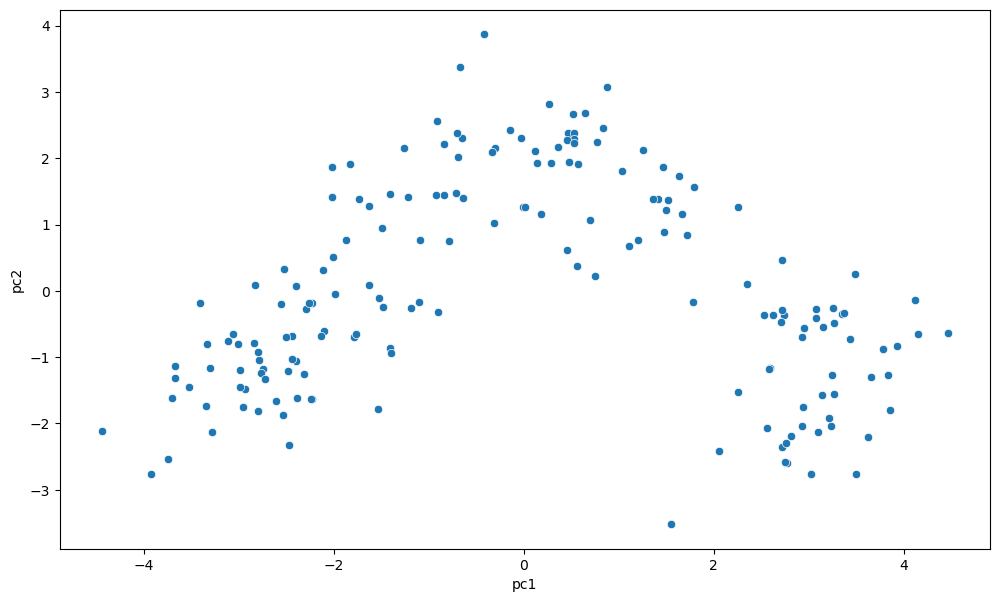

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=pca_components, x=pca_components.pc1, y=pca_components.pc2, palette='viridis')

> **Key Insights :** If we plot a scatterplot between any 2 PCA components we can see we can see no relation between the components 

In [15]:
pca_components.corr()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
pc1,1.000000e+00,2.335165e-16,1.410844e-17,1.337444e-16,1.097999e-16,2.074881e-16,-7.289149e-17,3.942954e-17,-7.815210e-18,-1.909925e-16,3.458417e-17,-6.452265e-18,-4.787019e-17,-1.212765e-16
pc2,2.335165e-16,1.000000e+00,-2.796524e-16,9.137438e-17,-1.365196e-16,1.164538e-16,1.805327e-16,2.201573e-17,-4.509127e-17,-1.493179e-16,8.388555e-17,3.170343e-17,1.365215e-16,-1.264023e-16
pc3,1.410844e-17,-2.796524e-16,1.000000e+00,-1.254573e-16,1.450681e-16,-1.514483e-16,-6.805334e-17,2.226760e-16,1.204181e-16,-6.456110e-18,-1.658937e-16,-1.227729e-16,9.654444e-17,1.499234e-16
pc4,1.337444e-16,9.137438e-17,-1.254573e-16,1.000000e+00,-1.168148e-16,3.441803e-16,-1.490828e-16,-6.457022e-17,-1.843276e-16,1.489044e-16,3.644607e-17,4.077874e-17,-1.216467e-16,8.651042e-17
pc5,1.097999e-16,-1.365196e-16,1.450681e-16,-1.168148e-16,1.000000e+00,-1.132411e-16,5.179624e-17,-7.765330e-17,-4.907411e-17,-8.060343e-17,-7.705844e-18,-6.725617e-17,-1.919162e-16,1.343067e-16
pc6,2.074881e-16,1.164538e-16,-1.514483e-16,3.441803e-16,-1.132411e-16,1.000000e+00,8.822055e-17,9.944883e-17,2.928377e-16,-1.049989e-16,9.400557e-18,-1.228505e-16,1.791726e-16,4.645066e-16
pc7,-7.289149e-17,1.805327e-16,-6.805334e-17,-1.490828e-16,5.179624e-17,8.822055e-17,1.000000e+00,-1.637656e-16,1.797940e-16,1.022670e-16,3.516911e-17,-7.709004e-17,7.369261e-17,-4.133955e-16
pc8,3.942954e-17,2.201573e-17,2.226760e-16,-6.457022e-17,-7.765330e-17,9.944883e-17,-1.637656e-16,1.000000e+00,1.554001e-17,-1.891803e-16,8.180098e-17,4.602724e-17,2.619462e-16,-8.769096e-17
pc9,-7.815210e-18,-4.509127e-17,1.204181e-16,-1.843276e-16,-4.907411e-17,2.928377e-16,1.797940e-16,1.554001e-17,1.000000e+00,1.709607e-16,7.436237e-17,1.076950e-16,4.262412e-16,-1.899956e-16
pc10,-1.909925e-16,-1.493179e-16,-6.456110e-18,1.489044e-16,-8.060343e-17,-1.049989e-16,1.022670e-16,-1.891803e-16,1.709607e-16,1.000000e+00,-1.661673e-16,1.736822e-16,-2.277400e-16,1.441930e-16


<Axes: >

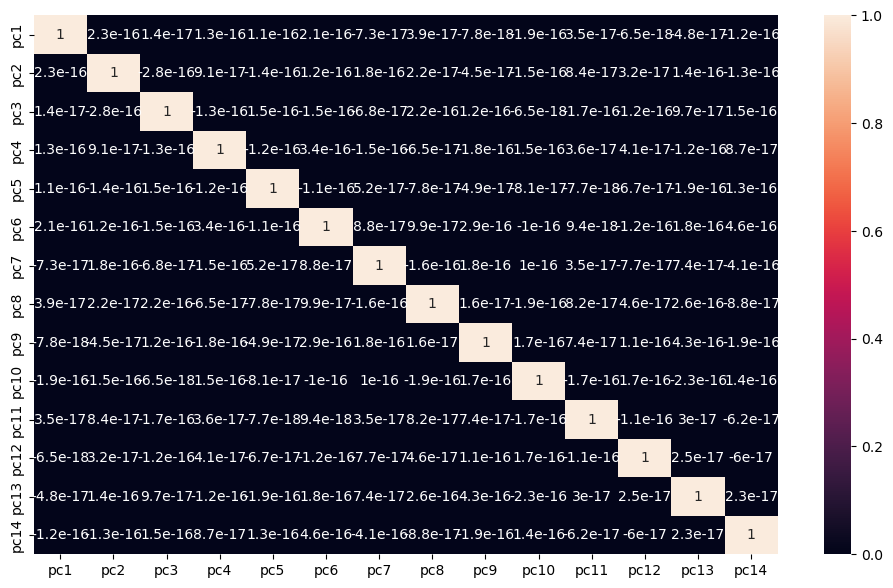

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(pca_components.corr(), annot=True)

> **Key Insights :** The standardized data is coverted to PCA,  we have converted all the columns to PCA, now we will find the eigen values which give the amount of variance thta each PCA explains

In [17]:
# The amount of variance that each PCA explains is given by the eigen values
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

> **Key Insights :** Form eigen value we can see that pca components, pca1 = 39.54%, pca2 = 17.83%, pca3 = 10.32%, pca4 = 06.62% and so on amount of variance is covered in different PCA components
the first 3 PCA have high variance so we can use first 3 PCA components 

##### To compute the percentage of variance (information) accounted for by each component, divide the eigenvalue of each component by the sum of eigenvalues¶


In [18]:
## Calculating Cumulative variance
cum_var = np.cumsum(np.round(var,decimals=4)*100)
cum_var

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [19]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [20]:
# Covariance
pca.get_covariance()

array([[ 1.00564972, -0.3300763 ,  0.44024952, -0.04992369,  0.52078487,
        -0.21036119, -0.72322641, -0.85228566,  0.49187249, -0.50194977,
         0.26716852, -0.62085717, -0.79268286, -0.63729711],
       [-0.3300763 ,  1.00564972,  0.09493026,  0.21273976, -0.31198788,
         0.27232816,  0.29073446,  0.23815287, -0.15681042,  0.13747022,
         0.549451  , -0.07215255,  0.07275191,  0.64735687],
       [ 0.44024952,  0.09493026,  1.00564972,  0.16497228,  0.29013035,
        -0.05488343, -0.3370606 , -0.41332866,  0.29463237, -0.22199334,
         0.25039204, -0.56446685, -0.37079354, -0.19309537],
       [-0.04992369,  0.21273976,  0.16497228,  1.00564972,  0.44587209,
         0.28820583,  0.12970824,  0.11572743,  0.1872826 ,  0.00970647,
         0.2603499 , -0.07508874,  0.00393333,  0.22488969],
       [ 0.52078487, -0.31198788,  0.29013035,  0.44587209,  1.00564972,
        -0.0838039 , -0.32292752, -0.353355  ,  0.36396647, -0.19844168,
         0.01883781, -0.27

## Scree Plot

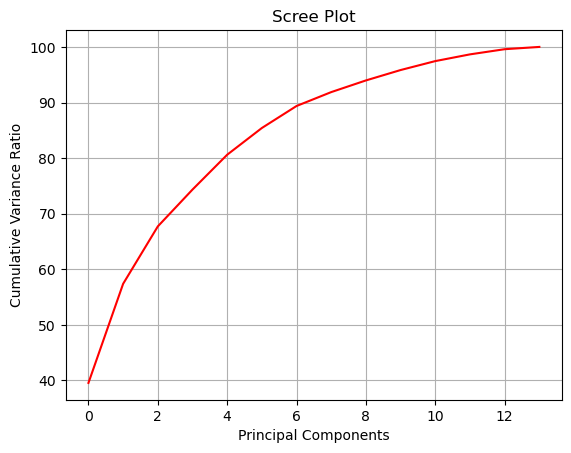

In [21]:
# Variance plot for PCA components obtained  Scree plot
plt.plot(cum_var,color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid()
plt.show()

> **Key Insights :** We can find that  using 14 pca components, from the cumuative variance we can alomost get 67.71% of variance in first 3 PCA

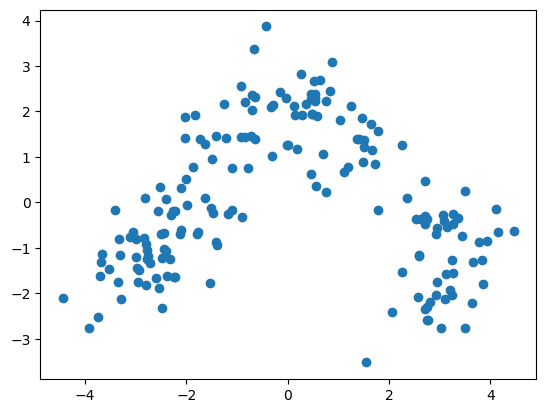

In [24]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [25]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)
finalDf

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


> **Key Insights :** Finallly we select the first 3 PCA's for further model building as it covers almost 67.71% of high variance 

In [26]:
x = finalDf.iloc[:,:-1]# PC1 PC2 i/p
y = finalDf['pc3']# pc3 o/p

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [29]:
mlr = LinearRegression()

mlr.fit(xtrain,ytrain)
ypred = mlr.predict(xtest)

In [30]:
import statsmodels.formula.api as smf

In [31]:
model = smf.ols('pc3~pc1+pc2',data=finalDf).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pc3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 24 Jul 2025   Prob (F-statistic):               1.00
Time:                        23:58:26   Log-Likelihood:                -285.40
No. Observations:                 178   AIC:                             576.8
Df Residuals:                     175   BIC:                             586.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-17      0.091  -3.05e-16      1.000      -0.179       0.179
pc1         2.396e-17      0.039    6.2e-16      1.000      -0.076       0.076
pc2        -1.475e-16      0.058  -2.56e-15      1.000      -0.114       0.114
==============================================================================
Omnibus:                       27.906   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.395
Skew:                           0.634   Prob(JB):                     1.90e-16
Kurtosis:                       5.855   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model.params

Intercept   -2.775558e-17
pc1          2.396087e-17
pc2         -1.474515e-16
dtype: float64

In [35]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept   -3.053332e-16
pc1          6.201865e-16
pc2         -2.563237e-15
dtype: float64 
 Intercept    1.0
pc1          1.0
pc2          1.0
dtype: float64


In [36]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.0, -0.011428571428571344)